# Data Exploration

## Import required libraries
We will import the libraries we will use during our exploration

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Implementation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Refinment
from sklearn.metrics import fbeta_score

## Import Data
We will load the dataset found in "data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [408]:
telco_dataset_file_path = '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(telco_dataset_file_path)
data.shape

(7043, 21)

In [409]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [410]:
# Fix wrong types

data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.TotalCharges.fillna((data.TotalCharges.mean()), inplace=True)

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Data sample

In [411]:
data.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [412]:
## Converting the sample to markdown
print(tabulate(data.head().transpose(), tablefmt="pipe", headers="keys"))

|                  | 0                | 1            | 2              | 3                         | 4                |
|:-----------------|:-----------------|:-------------|:---------------|:--------------------------|:-----------------|
| customerID       | 7590-VHVEG       | 5575-GNVDE   | 3668-QPYBK     | 7795-CFOCW                | 9237-HQITU       |
| gender           | Female           | Male         | Male           | Male                      | Female           |
| SeniorCitizen    | 0                | 0            | 0              | 0                         | 0                |
| Partner          | Yes              | No           | No             | No                        | No               |
| Dependents       | No               | No           | No             | No                        | No               |
| tenure           | 1                | 34           | 2              | 45                        | 2                |
| PhoneService     | No               | Yes     

## Basic statistics about the data

In [413]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,8183-ONMXC,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


## Plot the data

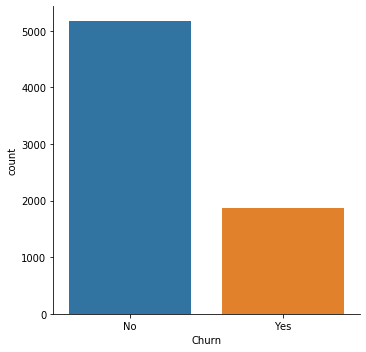

In [414]:
sns.catplot(x="Churn", kind="count", data=data)

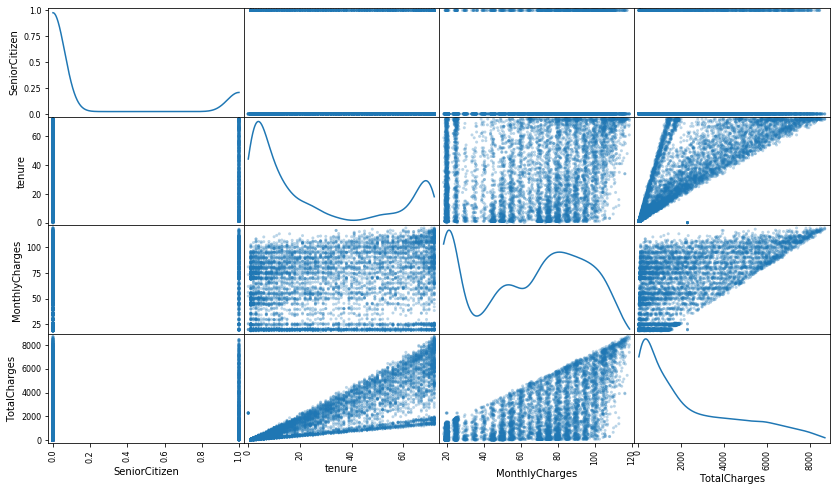

In [415]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Naive Classifier

In [416]:
data[data.Churn == 'Yes'].count

<bound method DataFrame.count of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2     3668-QPYBK    Male              0      No         No       2   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
8     7892-POOKP  Female              0     Yes         No      28   
13    0280-XJGEX    Male              0      No         No      49   
18    4190-MFLUW  Female              0     Yes        Yes      10   
20    8779-QRDMV    Male              1      No         No       1   
22    1066-JKSGK    Male              0      No         No       1   
26    6467-CHFZW    Male              0     Yes        Yes      47   
27    8665-UTDHZ    Male              0     Yes        Yes       1   
29    8773-HHUOZ  Female              0      No        Yes      17   
36    6047-YHPVI    Male              0      No         No       5   
38    5380-WJKOV    Male              0      No         N

In [417]:
precision = 1869/7043
recall = 1 
fscore = (1 + .5**2) * precision * recall / ((.5**2 * precision)+ recall)
fscore

0.3110748643520523

# Pre-processing

## Drop customer id

In [418]:
data = data.drop('customerID', axis=1)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Extract labels

In [419]:
y = data.Churn
X = data.drop('Churn', axis=1)
display(X.head(3))
display(y.head(3))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


0     No
1     No
2    Yes
Name: Churn, dtype: object

## Transform skewed features

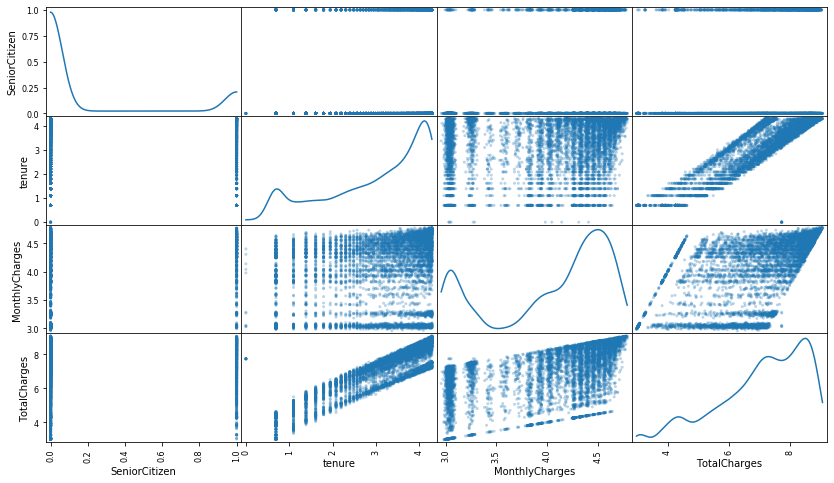

In [420]:
skewed = ['tenure', 'MonthlyCharges', 'TotalCharges']
features_log_transformed = pd.DataFrame(data = data)
features_log_transformed[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Normalize Numerical featuresm

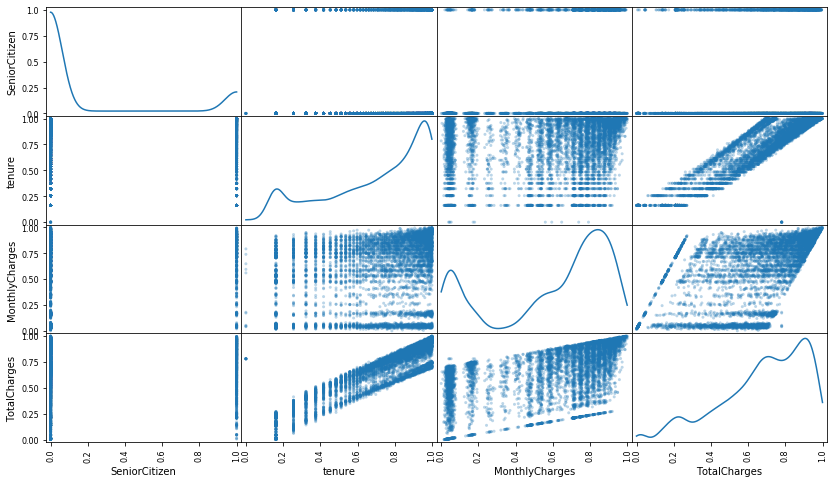

In [421]:

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## One-hot-Encode String Values

In [422]:
features_log_minmax_transform = pd.get_dummies(features_log_minmax_transform)
features_log_minmax_transform.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,0.161555,0.258016,0.072892,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0


## Label Encoding

In [423]:
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

# Implementation

## Shuffle and split the data

In [424]:
X_train, X_test, y_train, y_test = train_test_split(features_log_minmax_transform, 
                                                    y_encoded, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5634 samples.
Testing set has 1409 samples.


# Refinment

## Training

In [425]:
# Initialize the classifier
clf = GradientBoostingClassifier(random_state=0, verbose=True)

eval_set = [(X_train, y_train), (X_test, y_test)]
model = clf.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions_train = model.predict(X_train)

print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("F-score on training data: {:.4f}".format(fbeta_score(y_train, predictions_train, beta = 0.5)))

      Iter       Train Loss   Remaining Time 
         1           0.9697            0.98s
         2           0.8298            0.77s
         3           0.7194            0.60s
         4           0.6290            0.50s
         5           0.5532            0.44s
         6           0.4888            0.40s
         7           0.4335            0.37s
         8           0.3855            0.35s
         9           0.3436            0.33s
        10           0.3068            0.32s
        20           0.1051            0.23s
        30           0.0378            0.19s
        40           0.0138            0.15s
        50           0.0051            0.12s
        60           0.0019            0.09s
        70           0.0007            0.07s
        80           0.0006            0.05s
        90           0.0006            0.02s
       100           0.0006            0.00s
F-score on testing data: 1.0000
F-score on training data: 1.0000
